### Master thesis: Nissan Sales Forecasting in Finland using Machine Learning

#### Introduction:

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [ ]:
# Install statsmodels
%pip install statsmodels

In [2]:
# Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

plt.rcParams["figure.figsize"] = [16, 9]

### 1. Merging files into one single Excel file

In [1]:
# importing the required modules
import glob
import pandas as pd
import time
 
# specifying the path to source files and the output filename
path = 'D:/Git_Projects/5. Master_thesis/Data/'
filename = path + 'Retails_ALL_CY11_CY22.xlsx'

# excel files in the path
file_list = glob.glob(path + "Retails_CY*.xls*")

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the 
# excel data into pandas dataframe.
excl_list = []

print("Reading files....\n") 
start_time = time.time()

for file in file_list:
    print(file)
    excl_list.append(pd.read_excel(file))
 
# concatenate all DataFrames in the list
# into a single DataFrame, returns new
# DataFrame.
excl_merged = pd.concat(excl_list, ignore_index=True)
 
# exports the dataframe into excel file
# with specified name.
print('\nMerging %d files....\n' % len(file_list)) 
excl_merged.to_excel(filename, index=False)

end_time = time.time()
time_elapsed = end_time - start_time 
print('Completed in %f seconds.' % time_elapsed)

Reading files....

D:/Git_Projects/5. Master_thesis/Data\Retails_CY11.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY12.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY13.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY14.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY15.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY16.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY17.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY18.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY19.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY20.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY21.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY22.xlsx

Merging 12 files....

Completed in 348.761881 seconds.


In [2]:
# Load dataset
df = pd.concat(pd.read_excel(filename, sheet_name=None), ignore_index=True)

In [8]:
df

,vehOrderClassCode,RetailNSC,NSCModelGroupCode,ReportingModelGroup,orderNumber,FleetCode,DealerCodeRetail,orderCreatedDate,RetailCountry,RetailDate,...,FinancialOwnerCategoryCurrent,FinancialOwnerCategoryNext,RetailCount,VINCode,CustomerName,Month,ModelDescription,Quarter,TRIM,YEAR
0,U,37,F15,F15F,NNE0150004,NaN,130520,2010-06-17 09:38:00,DEN,02/01/2011 09:13:58,...,4,5,1,SJNFBAF15U6037010,NaN,Jan,NaN,NaN,NaN,NaN
1,B,37,D40,D40D,NNE0144170,011070,150110,2010-05-19 08:01:00,SWE,02/01/2011 15:12:15,...,4,5,1,VSKCAND40U0400996,GEA VVS,Jan,NaN,NaN,NaN,NaN
2,L,37,F15,F15F,NNE0161192,000194,160040,2010-10-15 14:44:00,FIN,03/01/2011 06:25:49,...,4,5,1,SJNFBAF15U6017454,Axus Finland/Via Tra,Jan,NaN,NaN,NaN,NaN
3,L,37,J10F,J10G,NNE0146363,000964,160040,2010-06-03 05:55:00,FIN,03/01/2011 06:28:35,...,4,5,1,SJNJAAJ10U7038560,Nordea Rahoitus/Icar,Jan,NaN,NaN,NaN,NaN
4,P,37,J10,J10B,NNE0147851,NaN,160230,2010-06-08 13:04:00,FIN,03/01/2011 06:30:20,...,4,5,1,SJNFAAJ10U2197900,KEMPPAINEN MATTI,Jan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465355,D,37,ZE1,ZE1A,NNE0646910,,151090,2022-03-02 07:49:21,SWE,01/08/2022 06:35:16,...,4,5,1,SJNFAAZE1U0165641,DEMO NORRKÄPING,August,NaN,Q2,NaN,2022.0
465356,P,37,ZE1,ZE1A,NNE0646922,,140240,2022-03-02 09:24:37,NOR,29/08/2022 08:58:14,...,4,5,1,SJNFAAZE1U0167182,Mikalsen,August,NaN,Q2,NaN,2022.0
465357,P,37,ZE1,ZE1A,NNE0646927,,140380,2022-03-02 09:47:36,NOR,15/08/2022 14:35:03,...,4,5,1,SJNFAAZE1U0166106,Eskilt,August,NaN,Q2,NaN,2022.0
465358,L,37,ZE1,ZE1A,NNE0647072,021717,151010,2022-03-04 10:09:25,SWE,10/08/2022 08:28:45,...,4,5,1,SJNFAAZE1U0165614,Carina Flygholm,August,NaN,Q2,NaN,2022.0


In [ ]:
# Get only Finland orders
df_Finland = df[df.BranchCode == 'FI']

# Remove duplicates
df_Finland.drop_duplicates(subset=['OrderNumber'], keep='last', inplace=True)

# Remove unnecessary columns
df_Finland.drop(['SalesPerformanceGroupCode', 'FinalDeliveryDealerAddr', 'LocationDealerAddr', 
        'CancellationDate', 'NSCModelGroupCode', 'ChangeDate',
       'VehOrderClassTypeCode', 'VehOrderClassCode', 'Year', 'Month', 'Day',
       'VehicleOrderClassTypeCodeChange', 'Return String', 'CustomerName',
       'CutomerContactDetails', 'AttachedSupplyCurrentStatus', 'Vin', 'UserID'], axis=1, inplace=True)

# Convert datetime column to just date
df_Finland['OrderCreatedDate'] = pd.to_datetime(df_Finland['OrderCreatedDate']).dt.date  
df_Finland['year'] = pd.DatetimeIndex(df_Finland['OrderCreatedDate']).year
df_Finland['month'] = pd.DatetimeIndex(df_Finland['OrderCreatedDate']).month   

# Get orders from 01-01-2016 onwards
df_Finland = df_Finland[df_Finland.year > 2015]

In [53]:
df_Finland.to_excel("output.xlsx")  

PermissionError: [Errno 13] Permission denied: 'output.xlsx'

In [58]:
# Using groupby() and count()
result = df_Finland.groupby(['year', 'month']).size().reset_index(name='Orders')
result['Date'] = pd.to_datetime(result[['year', 'month']].assign(DAY=1))
result.drop(['year', 'month'], axis=1, inplace=True)
result = result.set_index("Date")

In [62]:
result

,Orders
Date,
2016-01-01,48
2016-02-01,23
2016-03-01,27
2016-04-01,563
2016-05-01,69
...,...
2022-03-01,468
2022-04-01,337
2022-05-01,316


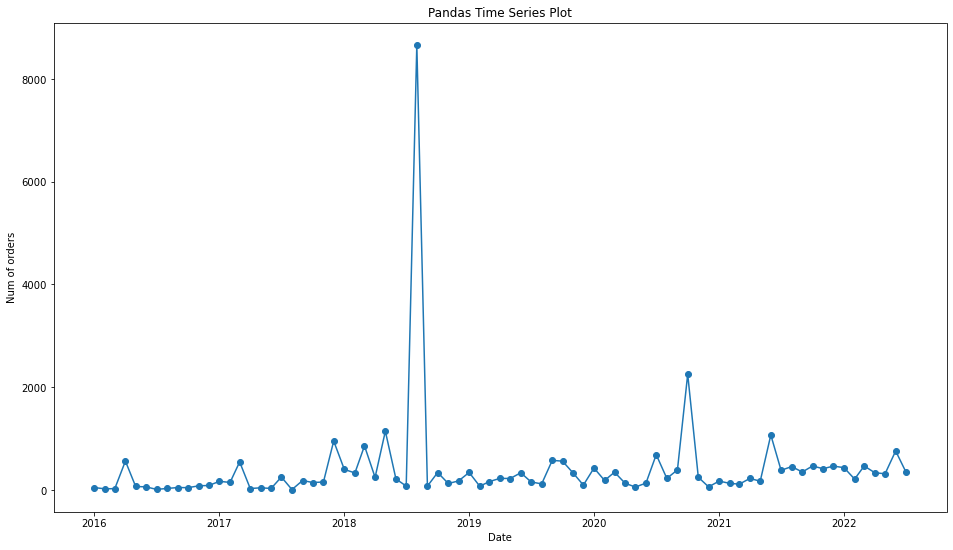

In [61]:
# Plot
plt.plot(result["Orders"], marker='o')

# Labelling 
plt.xlabel("Date")
plt.ylabel("Num of orders")
plt.title("Nissan Sales in Finland 2016-2022")

# Display
plt.show()

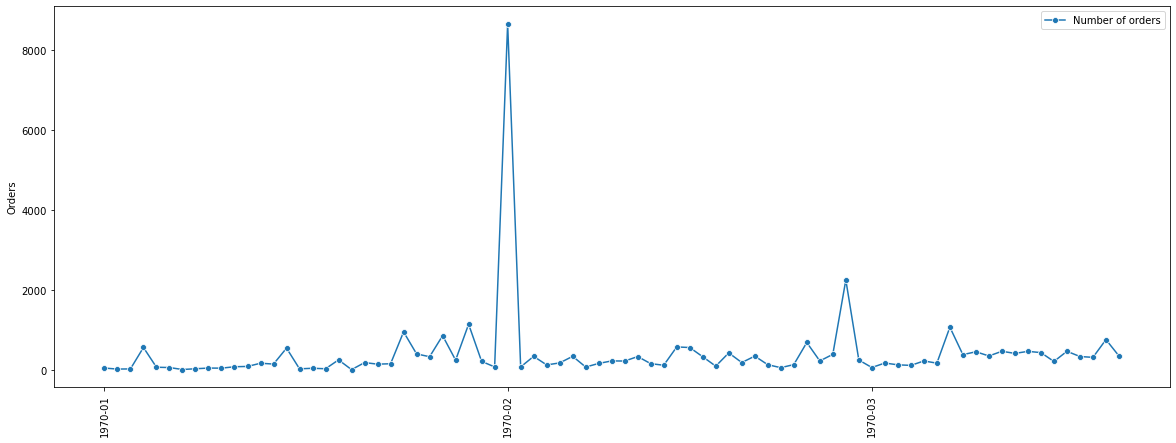

In [57]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot
fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot(data=result['Orders'], label = 'Number of orders', marker = 'o')
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model
ridge_reg = Ridge().fit(X_train, y_train)    
lasso_reg = Lasso().fit(X_train, y_train)

print("Ridge regression:")
print("Training set score: {:.2f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_reg.score(X_test, y_test)))
print("Number of features used: {}\n".format(np.sum(ridge_reg.coef_ != 0)))

print("Lasso regression:")
print("Training set score: {:.2f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_reg.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_reg.coef_ != 0)))

Ridge regression:
Training set score: 0.74
Test set score: 0.73
Number of features used: 81

Lasso regression:
Training set score: 0.66
Test set score: 0.65
Number of features used: 17


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2103871.1868631085, tolerance: 1754.3573232153894
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130237.3413718757, tolerance: 1754.3573232153894
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:ylabel='Model'>

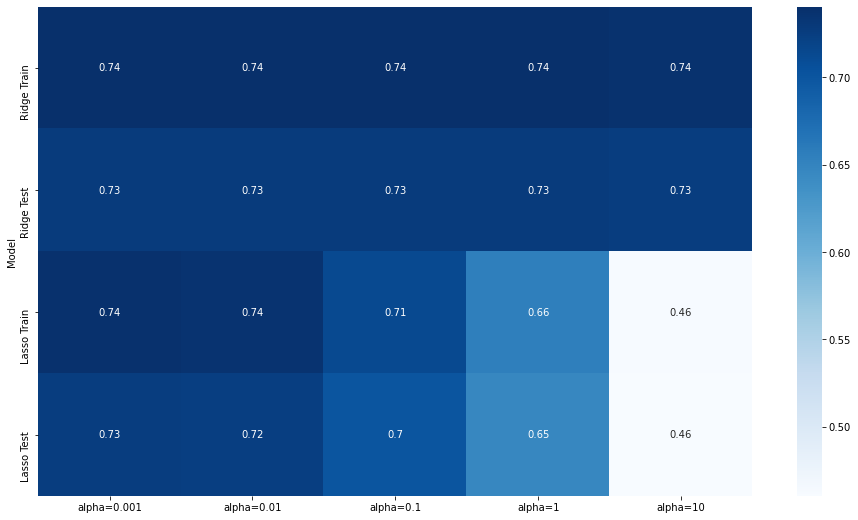

In [8]:
# Perform a simple manual optimization for one of the default parameters (at least 5 different values) 
alphas = [0.001,0.01,0.1,1,10]
models = ["Ridge Train", "Ridge Test", "Lasso Train", "Lasso Test"]

ridge_reg_train_scores = []
ridge_reg_test_scores = []

lasso_reg_train_scores = []
lasso_reg_test_scores = []

r2_dataset = pd.DataFrame()
r2_dataset["Model"] = models

for alpha in alphas:
    
    ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)    
    lasso_reg = Lasso(alpha=alpha).fit(X_train, y_train)

    ridge_reg_train_scores.append(ridge_reg.score(X_train, y_train))
    lasso_reg_train_scores.append(lasso_reg.score(X_train, y_train))

    ridge_reg_test_scores.append(ridge_reg.score(X_test, y_test))
    lasso_reg_test_scores.append(lasso_reg.score(X_test, y_test))
    
    r2_dataset[f"alpha={alpha}"] = [
        ridge_reg.score(X_train, y_train),
        ridge_reg.score(X_test, y_test),      
        lasso_reg.score(X_train, y_train), 
        lasso_reg.score(X_test, y_test) 
                            ]
                    
r2_dataset = r2_dataset.set_index('Model')
sns.heatmap(r2_dataset, annot=True, cmap="Blues")

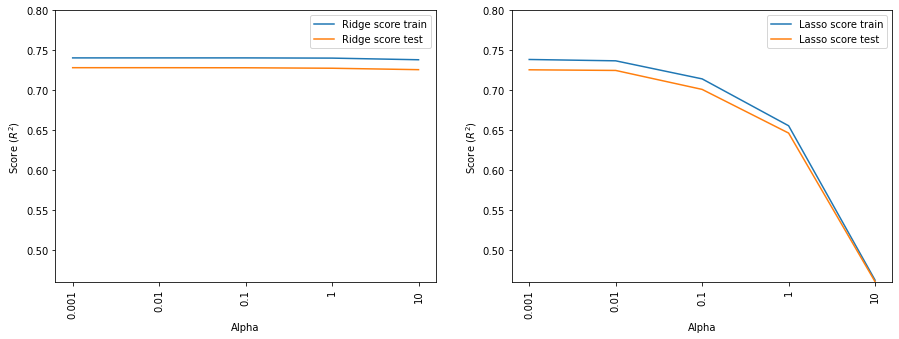

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(ridge_reg_train_scores, label="Ridge score train")
plt.plot(ridge_reg_test_scores, label="Ridge score test")
plt.ylim([0.46,0.8])
plt.xticks(range(len(alphas)), alphas, rotation=90)
plt.ylabel("Score ($R^2$)")
plt.xlabel("Alpha")
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(lasso_reg_train_scores, label="Lasso score train")
plt.plot(lasso_reg_test_scores, label="Lasso score test")
plt.ylim([0.46,0.8])
plt.xticks(range(len(alphas)), alphas, rotation=90)
plt.ylabel("Score ($R^2$)")
plt.xlabel("Alpha")
plt.legend()

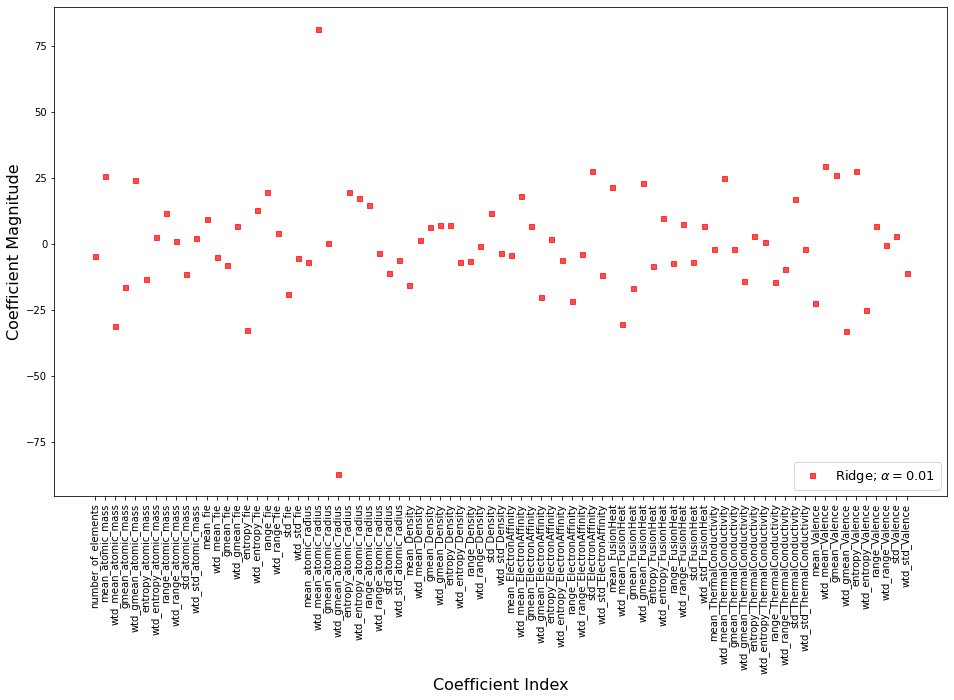

In [32]:
# Plot the coefficient magnitudes for the best model (Ridge - alpha 0.01)
ridge_reg = Ridge(alpha=0.01).fit(X_train, y_train)    

names = list(X.columns)
plt.plot(ridge_reg.coef_,alpha=0.7,linestyle='none',marker='s',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.xticks(range(len(names)), names, rotation=90)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [33]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_excel(url + 'default_of_credit_card_clients.xls', sheet_name='Data', header=1)

In [34]:
# Rename Target column
df = df.rename(columns={'default payment next month': 'Target'})

# Dropping features
df.drop(columns=['ID'], inplace=True)

# Convert columns from one data type to another
df["SEX"] = df["SEX"].astype('category')
df["EDUCATION"] = df["EDUCATION"].astype('category')
df["MARRIAGE"] = df["MARRIAGE"].astype('category')

# Separate dependent and independent variables
X = df.drop('Target',axis=1)
y = df['Target']

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Fit a Logistic Regression Model with train data
log_reg = LogisticRegression().fit(X_train, y_train)
lin_svc = LinearSVC().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [37]:
# Make predictions on the testing data
log_reg_pred = log_reg.predict(X_test)
lin_svc_pred = lin_svc.predict(X_test)

# Print the confusion matrix
print("Logistic Regression:")
print(metrics.confusion_matrix(y_test, log_reg_pred))
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, log_reg_pred, digits=3))

# Print the confusion matrix
print("SVM:")
print(metrics.confusion_matrix(y_test, lin_svc_pred))
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, lin_svc_pred, digits=3))

Logistic Regression:
[[6824  216]
 [1505  455]]
              precision    recall  f1-score   support

           0      0.819     0.969     0.888      7040
           1      0.678     0.232     0.346      1960

    accuracy                          0.809      9000
   macro avg      0.749     0.601     0.617      9000
weighted avg      0.789     0.809     0.770      9000

SVM:
[[6888  152]
 [1632  328]]
              precision    recall  f1-score   support

           0      0.808     0.978     0.885      7040
           1      0.683     0.167     0.269      1960

    accuracy                          0.802      9000
   macro avg      0.746     0.573     0.577      9000
weighted avg      0.781     0.802     0.751      9000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<AxesSubplot:ylabel='Model'>

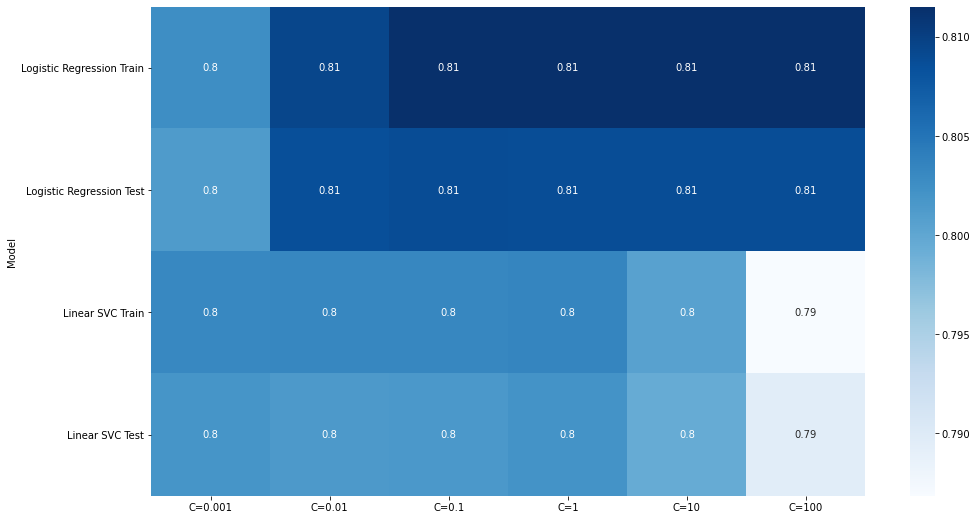

In [38]:
# Perform a simple manual optimization for one of the default parameters (at least 5 different values) 
C_param_range = [0.001,0.01,0.1,1,10,100]
models = ["Logistic Regression Train", "Logistic Regression Test", "Linear SVC Train", "Linear SVC Test"]

r2_dataset = pd.DataFrame()
r2_dataset["Model"] = models

log_reg_test_scores = []
log_reg_train_scores = []

lin_svc_test_scores = []
lin_svc_train_scores = []

for C_param in C_param_range:
    
    log_reg = LogisticRegression(C=C_param).fit(X_train, y_train)    
    lin_svc = LinearSVC(C=C_param).fit(X_train, y_train)
    
    log_reg_train_scores.append(log_reg.score(X_train, y_train))
    log_reg_test_scores.append(log_reg.score(X_test, y_test))

    lin_svc_train_scores.append(lin_svc.score(X_train, y_train))
    lin_svc_test_scores.append(lin_svc.score(X_test, y_test))

    r2_dataset[f"C={C_param}"] = [
        log_reg.score(X_train, y_train),
        log_reg.score(X_test, y_test),      
        lin_svc.score(X_train, y_train), 
        lin_svc.score(X_test, y_test) 
                            ]

r2_dataset = r2_dataset.set_index('Model')
sns.heatmap(r2_dataset, annot=True, cmap="Blues")

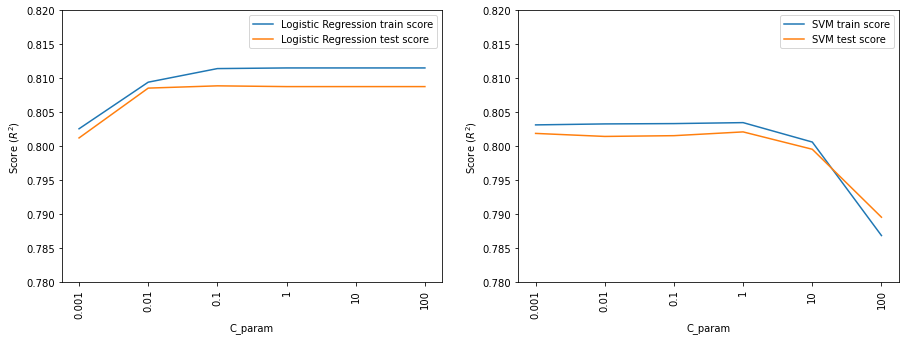

In [41]:
# Plot the new obtained score as a function of the chosen parameter
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(log_reg_train_scores, label="Logistic Regression train score")
plt.plot(log_reg_test_scores, label="Logistic Regression test score")
plt.ylim([0.78,0.82])
plt.xticks(range(len(C_param_range)), C_param_range, rotation=90)
plt.ylabel("Score ($R^2$)")
plt.xlabel("C_param")
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(lin_svc_train_scores, label="SVM train score")
plt.plot(lin_svc_test_scores, label="SVM test score")
plt.ylim([0.78,0.82])
plt.xticks(range(len(C_param_range)), C_param_range, rotation=90)
plt.ylabel("Score ($R^2$)")
plt.xlabel("C_param")
plt.legend(loc='best')

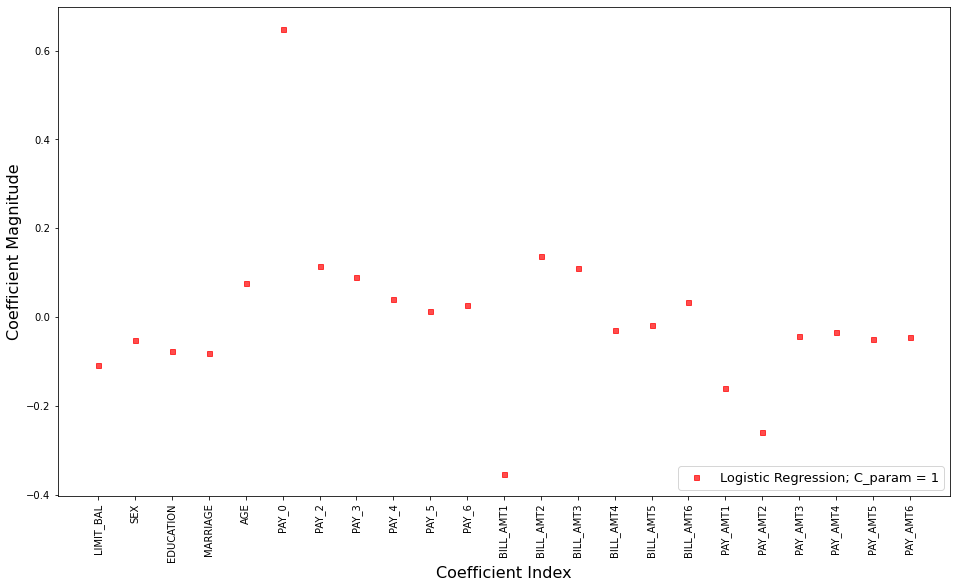

In [42]:
# Plot the coefficient magnitudes for the best model (Logisctic Regression - C 0.1)
log_reg = LogisticRegression(C=0.1).fit(X_train, y_train)    

names = list(df.drop('Target',axis=1).columns)
plt.plot(log_reg.coef_.T,alpha=0.7,linestyle='none',marker='s',markersize=5,color='red',label=r'Logistic Regression; C_param = 1',zorder=7) 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.xticks(range(len(names)), names, rotation=90)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [43]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'drug_consumption.csv', header=0)
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [44]:
predicted_class_names = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 
       'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
       'Mushrooms', 'Nicotine', 'VSA'
       ]

# Let's create a new quality class
# CL0 "Never Used" / CL1 "Used over a Decade Ago" --> No user 0
# CL2 "Used in Last Decade" / CL3 "Used in Last Year" --> Non-frequent user 1
# CL4 "Used in Last Month" / CL5 "Used in Last Week" / CL6 "Used in Last Day" --> Frequent user 2

for class_name in predicted_class_names:
       df.loc[((df[class_name] == 'CL0') | (df[class_name] == 'CL1')),'New'+ class_name] = 0
       df.loc[((df[class_name] == 'CL2') | (df[class_name] == 'CL3')),'New'+ class_name] = 1
       df.loc[((df[class_name] == 'CL4') | (df[class_name] == 'CL5') | (df[class_name] == 'CL6')),'New'+ class_name] = 2

feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

Predict label: NewCannabis
Model: KNeighborsClassifier()
Accuracy of the Model = 0.638

[[140  26   7]
 [ 58  44  53]
 [ 29  32 177]]
              precision    recall  f1-score   support

         0.0      0.617     0.809     0.700       173
         1.0      0.431     0.284     0.342       155
         2.0      0.747     0.744     0.745       238

    accuracy                          0.638       566
   macro avg      0.598     0.612     0.596       566
weighted avg      0.621     0.638     0.621       566

Predict label: NewCannabis
Model: RandomForestClassifier()
Accuracy of the Model = 0.645

[[129  28  16]
 [ 52  32  71]
 [ 21  13 204]]
              precision    recall  f1-score   support

         0.0      0.639     0.746     0.688       173
         1.0      0.438     0.206     0.281       155
         2.0      0.701     0.857     0.771       238

    accuracy                          0.645       566
   macro avg      0.593     0.603     0.580       566
weighted avg      0.610

<AxesSubplot:ylabel='Model'>

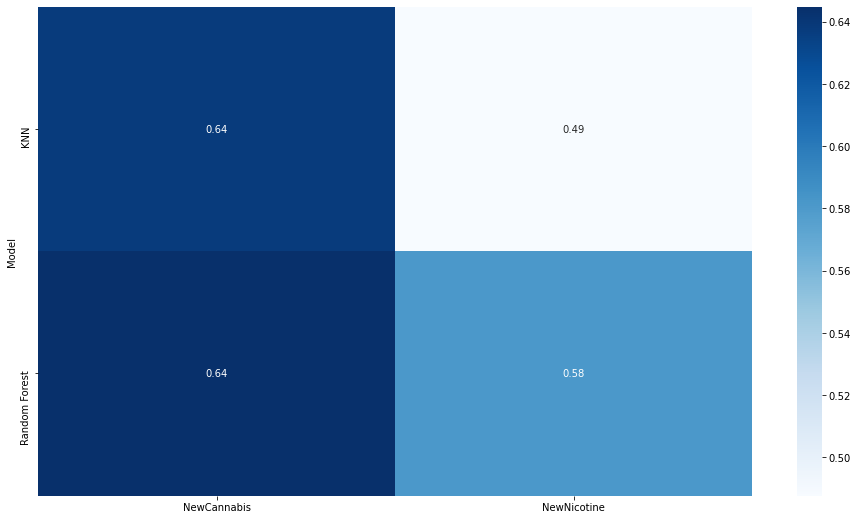

In [45]:
X = df[feature_col_names].values

predicted_classes = ['NewCannabis', 'NewNicotine']

models = ["KNN", "Random Forest"]

r2_dataset = pd.DataFrame()
r2_dataset["Model"] = models

for predicted_class in predicted_classes:
        
    y = df[predicted_class].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fitting K Neighboirs Classification to the Training set
    model = KNeighborsClassifier().fit(X_train,y_train.ravel())
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    accuracy_knn = metrics.accuracy_score(y_test,y_pred)    
    print("Predict label:", predicted_class)
    print("Model:", model)
    print('Accuracy of the Model = {:0.3f}\n'.format(accuracy_knn))

    # Print the confusion matrix
    print(metrics.confusion_matrix(y_test, y_pred))
    # Print the precision and recall, among other metrics
    print(metrics.classification_report(y_test, y_pred, digits=3))

    # Fitting Random Forest Classification to the Training set
    model = RandomForestClassifier().fit(X_train, y_train.ravel())
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    accuracy_rnf = metrics.accuracy_score(y_test,y_pred)    
    print("Predict label:", predicted_class)
    print("Model:", model)
    print('Accuracy of the Model = {:0.3f}\n'.format(accuracy_rnf))    

    # Print the confusion matrix
    print(metrics.confusion_matrix(y_test, y_pred))
    # Print the precision and recall, among other metrics
    print(metrics.classification_report(y_test, y_pred, digits=3))

    r2_dataset[f"{predicted_class}"] = [
        accuracy_knn,
        accuracy_rnf
                            ]

r2_dataset = r2_dataset.set_index('Model')
sns.heatmap(r2_dataset, annot=True, cmap="Blues")



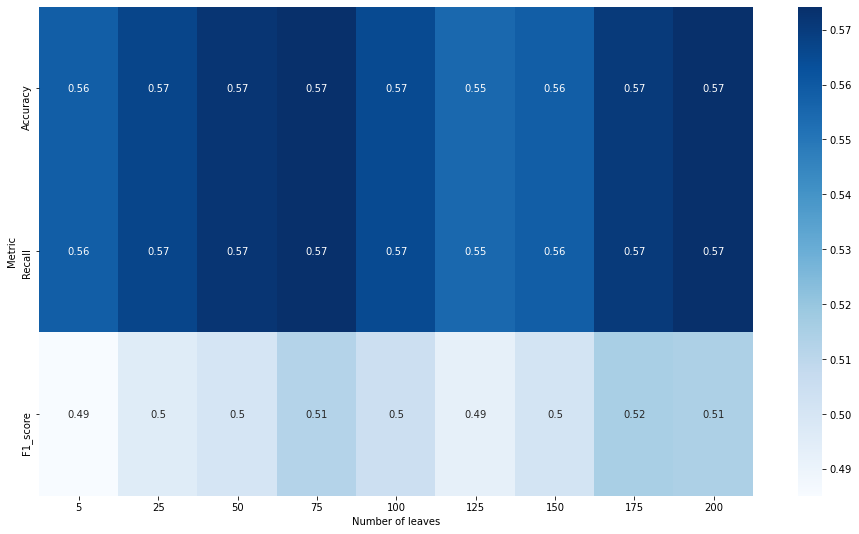

In [49]:
# Perform a simple manual optimization for one of the default parameters (at least 5 different values) 
max_leaves = [5, 25, 50, 75, 100, 125, 150, 175, 200]
scores = ["Accuracy", "Recall", "F1_score"]

accuracies = []
accuracies_train = []

scores_dataset = pd.DataFrame()
scores_dataset["Metric"] = scores

predicted_classes = ['NewCannabis']
X = df[feature_col_names].values
y = df[predicted_class].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for max_leaf in max_leaves:
    
    # Fitting Random Forest Classification to the Training set
    model = RandomForestClassifier(max_leaf_nodes=max_leaf).fit(X_train, y_train.ravel())
   
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test,y_pred))

    # Predicting the Train set results
    y_pred_train = model.predict(X_train)
    accuracies_train.append(metrics.accuracy_score(y_train,y_pred_train))
    
    scores_dataset[f"{max_leaf}"] = [
        metrics.accuracy_score(y_test,y_pred),
        metrics.recall_score(y_test, y_pred, average='weighted'),      
        metrics.f1_score(y_test, y_pred, average='weighted')     
        ]                                

scores_dataset

scores_dataset = scores_dataset.set_index('Metric')
sns.heatmap(scores_dataset, annot=True, cmap="Blues")
plt.xlabel("Number of leaves") 
plt.show()

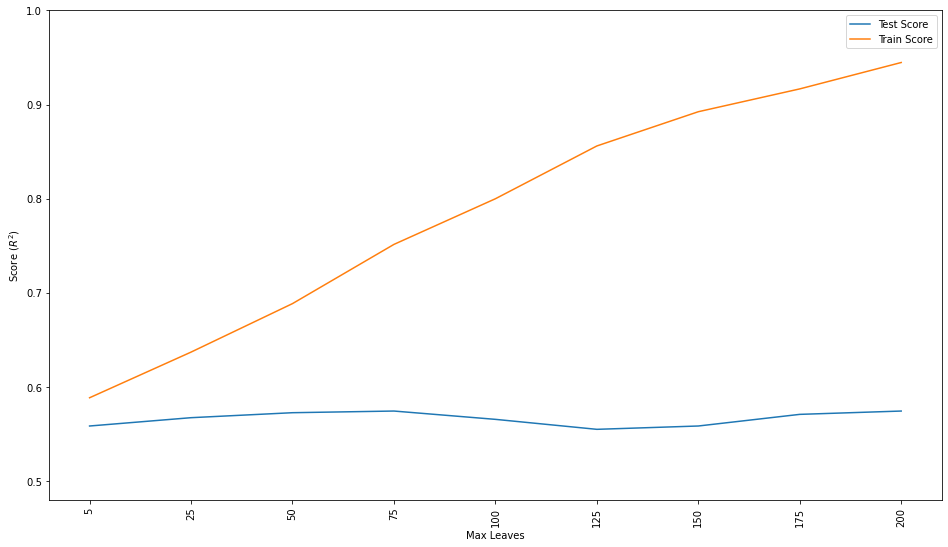

In [50]:
# Plot the new obtained score as a function of the chosen parameter
def plot_score():        
    plt.plot(accuracies, label="Test Score")
    plt.plot(accuracies_train, label="Train Score")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("Max Leaves")
    plt.ylim([0.48,1])
    plt.xticks(range(len(max_leaves)), max_leaves, rotation=90)
    plt.gca().invert_xaxis()
    plt.legend()

plot_score()
plt.gca().invert_xaxis()

In [62]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'drug_consumption.csv', header=0)

dfA = df.copy()
dfB = df.copy()
dfC = df.copy()


predicted_class_names = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 
       'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
       'Mushrooms', 'Nicotine', 'Semer', 'VSA'
       ]

feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Let's create a new quality classes
for class_name in predicted_class_names:

#  - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).   
    df.loc[((df[class_name] == 'CL0')), 'A' + class_name] = 0
    df.loc[((df[class_name] == 'CL1') | 
        (df[class_name] == 'CL2') | 
        (df[class_name] == 'CL3') | 
        (df[class_name] == 'CL4') |
        (df[class_name] == 'CL5') | 
        (df[class_name] == 'CL6')), 'A' + class_name] = 1

#  - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
    df.loc[((df[class_name] == 'CL0') | (df[class_name] == 'CL1')), 'B' + class_name] = 0
    df.loc[((df[class_name] == 'CL2') | 
        (df[class_name] == 'CL3') | 
        (df[class_name] == 'CL4') |
        (df[class_name] == 'CL5') | 
        (df[class_name] == 'CL6')), 'B' + class_name] = 1
        
#  - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
    df.loc[((df[class_name] == 'CL0') | (df[class_name] == 'CL1') | (df[class_name] == 'CL2')), 'C' + class_name] = 0
    df.loc[((df[class_name] == 'CL3') | 
        (df[class_name] == 'CL4') |
        (df[class_name] == 'CL5') | 
        (df[class_name] == 'CL6')), 'C' + class_name] = 1                

    df.loc[((df[class_name] == 'CL0')), class_name] = 0
    df.loc[((df[class_name] == 'CL1')), class_name] = 1
    df.loc[((df[class_name] == 'CL2')), class_name] = 2
    df.loc[((df[class_name] == 'CL3')), class_name] = 3
    df.loc[((df[class_name] == 'CL4')), class_name] = 4
    df.loc[((df[class_name] == 'CL5')), class_name] = 5
    df.loc[((df[class_name] == 'CL6')), class_name] = 6        
    


In [63]:
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,CMushrooms,ANicotine,BNicotine,CNicotine,ASemer,BSemer,CSemer,AVSA,BVSA,CVSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


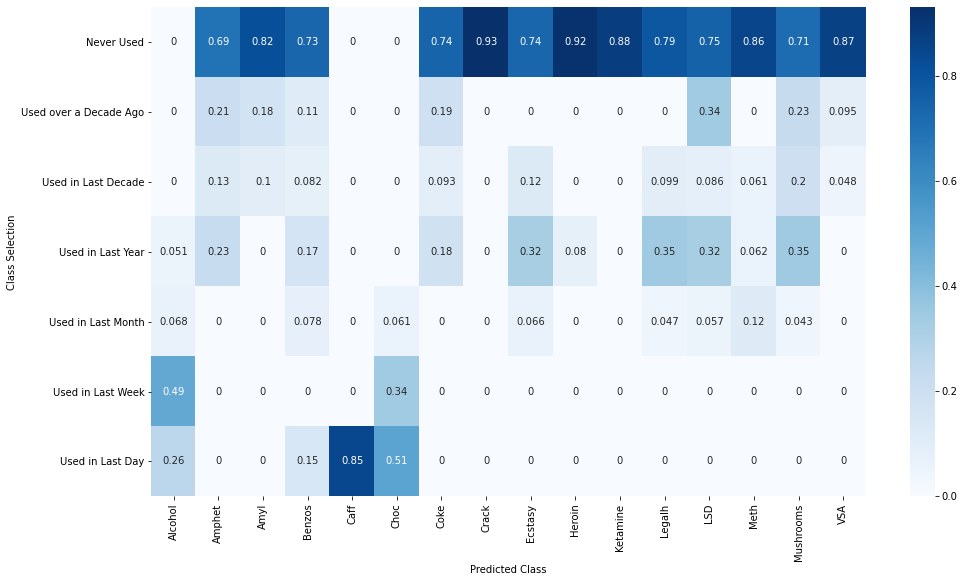

In [97]:
# Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
predicted_classes = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 
       'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'VSA'
       ]

columns = ["Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"]

X = df[feature_col_names].values

f1_scores = []

r2_dataset = pd.DataFrame()
r2_dataset["Model"] = models

for predicted_class in predicted_classes:
        
    y = df[predicted_class].values.astype('int')

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fitting Random Forest Classification to the Training set
    model = RandomForestClassifier().fit(X_train, y_train.ravel())
    # Predicting the Test set results
    y_pred = model.predict(X_test)

    f1_scores.append(metrics.f1_score(y_test,y_pred, average=None))

results = pd.DataFrame(f1_scores, index = predicted_classes,  
    columns = columns, dtype = float)

results_transposed = results.transpose()

sns.heatmap(results_transposed, annot=True, cmap="Blues")
plt.ylabel("Class Selection") 
plt.xlabel("Predicted Class") 
plt.xticks(rotation=90) 
plt.show()


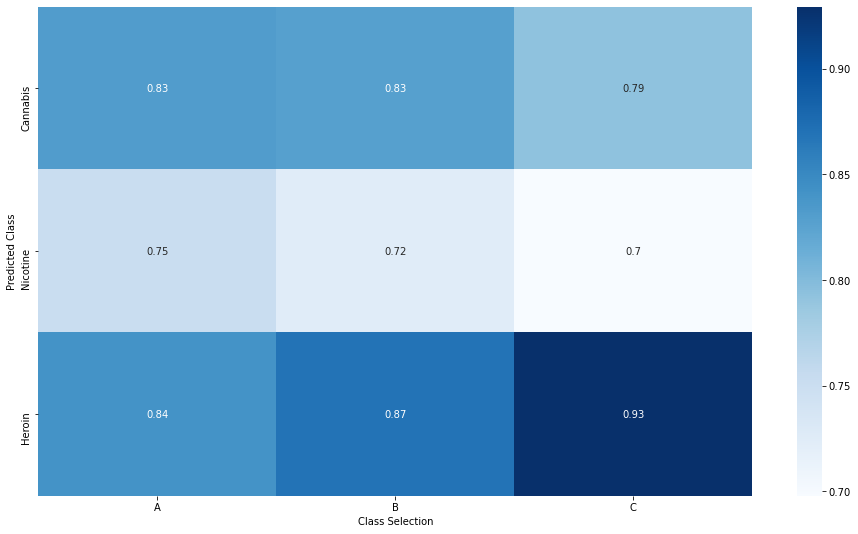

In [82]:
# * Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
#  - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
#  - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
#  - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).

X = df[feature_col_names].values

predicted_classes = ['Cannabis', 'Nicotine', 'Heroin']
class_choice = ['A', 'B', 'C']
listofaccuracies = []

for predicted_class in predicted_classes:

    accuracies = []

    for i in class_choice:
        
        y = df[i + predicted_class].values.astype('int')

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

        # Feature Scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Fitting Logisitc Regresssion Classification to the Training set
        model = LogisticRegression().fit(X_train,y_train)
        # Predicting the Test set results
        y_pred = model.predict(X_test)
    
        accuracy = metrics.accuracy_score(y_test,y_pred)    
        accuracies.append(accuracy)

    listofaccuracies.append(accuracies)

predicted_classes = ['Cannabis', 'Nicotine', 'Heroin']
results = pd.DataFrame(listofaccuracies, index = predicted_classes,  columns = class_choice, dtype = float)


sns.heatmap(results, annot=True, cmap="Blues")
plt.xlabel("Class Selection") 
plt.ylabel("Predicted Class") 
plt.show()


In [55]:
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,AMeth,CMeth,AMushrooms,CMushrooms,ANicotine,CNicotine,ASemer,CSemer,AVSA,CVSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0
